# Read Data over USB Serial
Connecting to a USB serial port to get data from an Arduino. To install the software run:

`apt-get install python-serial`

In [1]:
%ls /dev/ttyACM*

/dev/ttyACM0


## Setup the serial configuration
Check that the serial device printed by the command above matches the `portPath` below:

In [2]:
%matplotlib notebook
import serial
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
from datetime import datetime, date
import threading

 
portPath = "/dev/ttyACM0"       # Must match value shown on Arduino IDE
baud = 115200                   # Must match Arduino baud rate
timeout = 5                     # Seconds
filename = str(date.today()) + " data.csv"
max_num_readings = 8
num_signals = 1
 
 
 
def create_serial_obj(portPath, baud_rate, tout):
    """
    Given the port path, baud rate, and timeout value, creates and returns a pyserial object.
    """
    return serial.Serial(portPath, baud_rate, timeout = tout)

In [3]:
def read_serial_data(serial):
    """
    Given a pyserial object (serial). Outputs a list of lines read in from the serial port
    """
    #serial.flushInput()
    serial.reset_input_buffer()
    
    serial_data = []
    readings_left = True
    timeout_reached = False
    
    #Send data to start the transfer
    serial.write(1)
    #Wait for the data to be ready
    time.sleep(2)
    
    while readings_left and not timeout_reached:
        serial_line = serial.readline()
        if serial_line == b'':
            timeout_reached = True
        else:
            serial_data.append(serial_line)
            if len(serial_data) == max_num_readings:
                readings_left = False
        
    return serial_data

In [132]:
headers = ["PM 0.3","PM 0.5","PM 1.0","PM 2.5","PM 5.0","PM 10.0","Temp","Pressure","Humidity","CO2",
           "BME680 VOC","QM9 VOC","MiCS5524 VOC","CCS811 VOC","Date"]
try:
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
    df = pd.read_csv(filename, parse_dates=['Date'], date_parser=dateparse,index_col=0)
    df
except:
    df = pd.DataFrame() #Create an empty data frame to append to later

#Create a serial port object
serial_obj = create_serial_obj(portPath, baud, timeout)

In [133]:
df

,PM 0.3,PM 0.5,PM 1.0,PM 2.5,PM 5.0,PM 10.0,Temp,Pressure,Humidity,CO2,BME680 VOC,QM9 VOC,MiCS5524 VOC,CCS811 VOC,Date
0,426,106,17,2,0,0,27.90,1011.50,38.00,400,2.98,564,40,0,2020-06-03 16:23:11.653966
0,417,106,17,2,0,0,27.93,1011.50,37.71,417,4.15,559,42,2,2020-06-03 16:23:45.290923
0,327,82,10,2,0,0,27.96,1011.48,37.57,420,5.64,554,42,3,2020-06-03 16:23:59.261634
0,327,82,10,2,0,0,27.99,1011.48,37.34,424,7.08,552,44,3,2020-06-03 16:24:22.698525
0,360,88,27,2,2,2,28.82,1011.42,33.55,408,12.23,489,42,1,2020-06-03 16:31:45.375307
0,366,93,27,2,2,2,28.84,1011.42,33.43,408,15.46,489,44,1,2020-06-03 16:31:54.924593
0,258,74,12,2,2,0,28.85,1011.42,33.36,408,18.52,483,44,1,2020-06-03 16:32:03.041052
0,258,74,12,2,2,0,28.86,1011.40,33.29,411,21.10,488,44,1,2020-06-03 16:32:13.115006
0,384,106,10,2,2,0,28.87,1011.42,33.26,417,23.48,480,39,2,2020-06-03 16:32:21.786762
0,390,106,12,2,2,0,28.89,1011.40,33.20,417,25.87,490,40,2,2020-06-03 16:32:30.415574


In [6]:
def is_number(string):
    """
    Given a string returns True if the string represents a number.
    Returns False otherwise.
    """
    try:
        float(string)
        return True
    except ValueError:
        return False
        
def clean_serial_data(data):
    """
    Given a list of serial lines (data). Removes all characters.
    Returns the cleaned list of lists of digits.
    Given something like: ['0.5000,33\r\n', '1.0000,283\r\n']
    Returns: [[0.5,33.0], [1.0,283.0]]
    """
    clean_data = []
    
    for line in data:
        line_data = line.decode("utf-8", "ignore").strip()
        #line_data = re.findall("\d*\.\d*|\d*",line) # Find all digits
        #line_data = [float(element) for element in line_data if is_number(element)] # Convert strings to float
        #line_data = line_data datetime.now()
    clean_data.append(line_data)
        
    return clean_data

In [25]:
keep_going = True

def collect_data(sleep_time):
    global df
    global serial_obj
    while keep_going:
        
        serial_data = read_serial_data(serial_obj)
        clean_data =  clean_serial_data(serial_data)
        clean_data_table = [clean_data]
        clean_data_table = pd.DataFrame([sub.split(",") for sub in clean_data])
        clean_data_table['Date'] = [datetime.now()]
        clean_data_table.columns = headers
        df = df.append(clean_data_table)
        
        time.sleep(sleep_time) #Seconds
    return 1 #Return positive if success

In [134]:
def animate(i):
    global df
    global plt
    global serial_obj
    
#    serial_data = read_serial_data(serial_obj)
#    clean_data =  clean_serial_data(serial_data)
#    clean_data_table = [clean_data]
#    clean_data_table = pd.DataFrame([sub.split(",") for sub in clean_data])
#    clean_data_table['Date'] = [datetime.now()]
#    clean_data_table.columns = headers
#    df = df.append(clean_data_table)
    
    plot_df = df
    
    x = plot_df['Date']
    y1 = plot_df['PM 0.3']
    y2 = plot_df['PM 0.5']
    y3 = plot_df['PM 1.0']
    y4 = plot_df['PM 2.5']
    y5 = plot_df['PM 5.0']
    y6 = plot_df['PM 10.0']

    # plot
    plt.cla()
    plt.plot(x,y1, label='PM 0.3')
    plt.plot(x,y2, label='PM 0.5')
    plt.plot(x,y3, label='PM 1.0')
    plt.plot(x,y4, label='PM 2.5')
    plt.plot(x,y5, label='PM 5.0')
    plt.plot(x,y6, label='PM 10.0')

    plt.legend()
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    plt.xlabel('Time')
    plt.ylabel('Particulate matter (µm)')
    plt.title("Indoor Air Quality")
    #plt.ylim(ymin=0,ymax=85)


In [177]:
keep_going = True
t1=threading.Thread(target=collect_data, args=[1.0])
t1.start()

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 0
Data columns (total 15 columns):
PM 0.3          819 non-null object
PM 0.5          819 non-null object
PM 1.0          819 non-null object
PM 2.5          819 non-null object
PM 5.0          819 non-null object
PM 10.0         819 non-null object
Temp            819 non-null object
Pressure        819 non-null object
Humidity        819 non-null object
CO2             819 non-null object
BME680 VOC      819 non-null object
QM9 VOC         819 non-null object
MiCS5524 VOC    819 non-null object
CCS811 VOC      819 non-null object
Date            819 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(14)
memory usage: 57.6+ KB


In [187]:
t1

<Thread(Thread-13, stopped -1405827984)>

In [186]:
keep_going = False
t1.join()

<IPython.core.display.Javascript object>


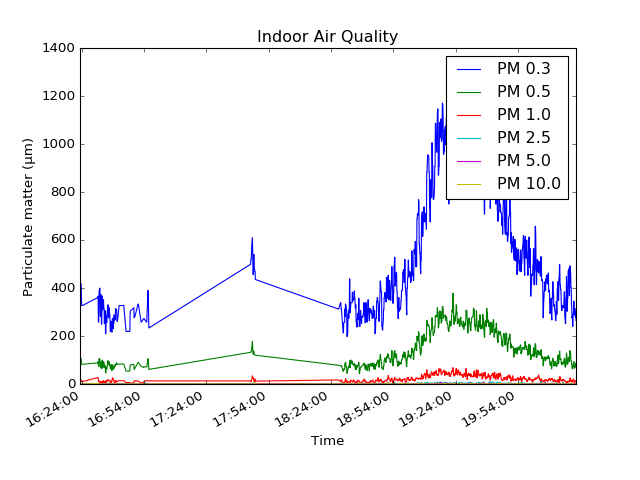

In [184]:
ani = FuncAnimation(plt.gcf(), animate,interval=1000)

plt.show()

In [129]:
serial_data = read_serial_data(serial_obj)
clean_data =  clean_serial_data(serial_data)
clean_data_table = [clean_data]
clean_data_table = pd.DataFrame([sub.split(",") for sub in clean_data])
clean_data_table['Date'] = [datetime.now()]
clean_data_table.columns = headers


In [130]:
df = df.append(clean_data_table)

<IPython.core.display.Javascript object>


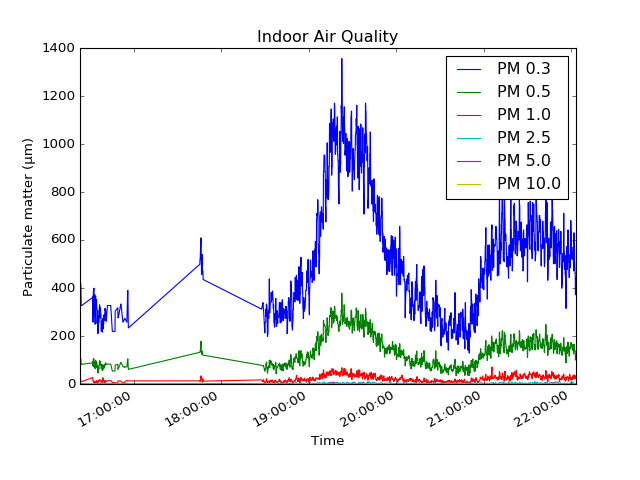

In [185]:
animate(1)

In [189]:
try:
    df[headers] #Make sure the DataFrame is in the correct order
    df.to_csv(filename,names=headers)
except:
    df = pd.DataFrame() #Create an empty data frame to append to later

df[headers] #Make sure the DataFrame is in the correct order
df.to_csv(filename,names=headers)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 0
Data columns (total 15 columns):
PM 0.3          1684 non-null object
PM 0.5          1684 non-null object
PM 1.0          1684 non-null object
PM 2.5          1684 non-null object
PM 5.0          1684 non-null object
PM 10.0         1684 non-null object
Temp            1684 non-null object
Pressure        1684 non-null object
Humidity        1684 non-null object
CO2             1684 non-null object
BME680 VOC      1684 non-null object
QM9 VOC         1684 non-null object
MiCS5524 VOC    1684 non-null object
CCS811 VOC      1684 non-null object
Date            1684 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(14)
memory usage: 118.4+ KB


In [190]:
df[headers[0:14]]

,PM 0.3,PM 0.5,PM 1.0,PM 2.5,PM 5.0,PM 10.0,Temp,Pressure,Humidity,CO2,BME680 VOC,QM9 VOC,MiCS5524 VOC,CCS811 VOC
0,426,106,17,2,0,0,27.9,1011.5,38,400,2.98,564,40,0
0,417,106,17,2,0,0,27.93,1011.5,37.71,417,4.15,559,42,2
0,327,82,10,2,0,0,27.96,1011.48,37.57,420,5.64,554,42,3
0,327,82,10,2,0,0,27.99,1011.48,37.34,424,7.08,552,44,3
0,360,88,27,2,2,2,28.82,1011.42,33.55,408,12.23,489,42,1
0,366,93,27,2,2,2,28.84,1011.42,33.43,408,15.46,489,44,1
0,258,74,12,2,2,0,28.85,1011.42,33.36,408,18.52,483,44,1
0,258,74,12,2,2,0,28.86,1011.4,33.29,411,21.1,488,44,1
0,384,106,10,2,2,0,28.87,1011.42,33.26,417,23.48,480,39,2
0,390,106,12,2,2,0,28.89,1011.4,33.2,417,25.87,490,40,2
